Решение найдено за 24 итераций: z0 = 0.847486


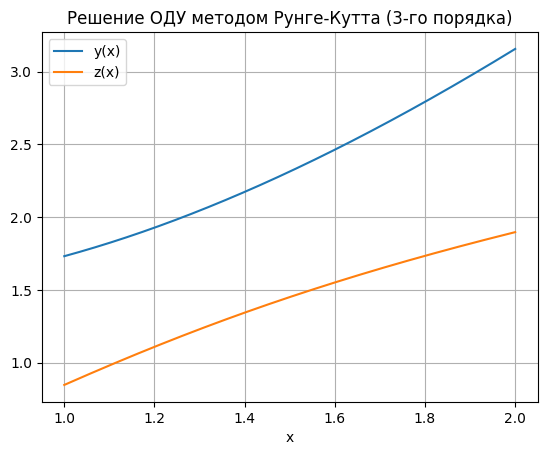

In [2]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.001  # шаг
N = int(1 / h)  # число шагов
x = np.linspace(1, 2, N+1)

# Начальные условия
y0 = np.sqrt(3)

def f_y(y, z, x):
    return z

def f_z(y, z, x):
    return -(z * z / y) + 2 * z / x;

# Рунге-Кутта 3-го порядка
def runge_kutta_step(y, z, x, h):
    k1 = f_y(y, z, x)
    m1 = f_z(y, x, z)
    
    k2 = f_y(y + 0.5 * h * k1, z + 0.5 * h * m1, x + 0.5 * h)
    m2 = f_z(y + 0.5 * h * k1, z + 0.5 * h * m1, x + 0.5 * h)
    
    k3 = f_y(y + h * (-k1 + 2 * k2), z + h * (-m1 + 2 * m2), x + h)
    m3 = f_z(y + h * (-k1 + 2 * k2), z + h * (-m1 + 2 * m2), x + h)

    y_next = y + h * (k1 + 4 * k2 + k3) / 6
    z_next = z + h * (m1 + 4 * m2 + m3) / 6

    return y_next, z_next

# Метод пристрелки
def shooting_method(z0_guess, target_z1):
    y = np.zeros(N+1)
    z = np.zeros(N+1)
    y[0] = y0
    z[0] = z0_guess

    for i in range(N):
        y[i+1], z[i+1] = runge_kutta_step(y[i], z[i], x[i], h)

    return z[-1], y, z

# Целевое значение
target_z1 = 6 / np.sqrt(10)

max_iterations = 1000
tolerance = 1e-6
left = 0
right = 50

for iteration in range(max_iterations):
    z0_guess = (left + right) / 2
    z1, y_values, z_values = shooting_method(z0_guess, target_z1)

    if abs(z1 - target_z1) < tolerance:
        print(f"Решение найдено за {iteration+1} итераций: z0 = {z0_guess:.6f}")
        break
    
    if z1 < target_z1:
        left = z0_guess
    else:
        right = z0_guess
else:
    print("Решение не найдено за заданное число итераций")

# Визуализация решения
plt.plot(x, y_values, label='y(x)')
plt.plot(x, z_values, label='z(x)')
plt.xlabel('x')
plt.legend()
plt.title('Решение ОДУ методом Рунге-Кутта (3-го порядка)')
plt.grid()
plt.show()


Решение найдено за 22 итераций: z0 = 0.865901


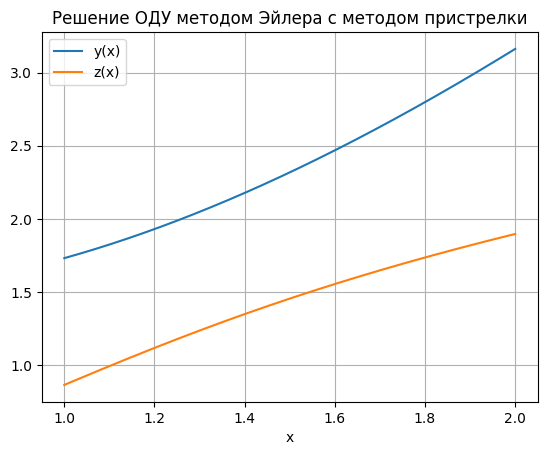

In [1]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.001  # шаг
N = int(1 / h)  # число шагов
x = np.linspace(1, 2, N+1)

# Начальные условия
y0 = np.sqrt(3)

def f_y(y, z, x):
    return z

def f_z(y, z, x):
    return -(z * z / y) + 2 * z / x;

# Метод пристрелки с использованием метода Эйлера
def shooting_method(z0_guess, target_z1):
    y = np.zeros(N + 1)
    z = np.zeros(N + 1)
    y[0] = y0
    z[0] = z0_guess

    for i in range(N):
        y[i + 1] = y[i] + h * f_y(y[i], z[i], x[i])
        z[i + 1] = z[i] + h * f_z(y[i], z[i], x[i])

    return z[-1], y, z

# Целевое значение для z(1)
target_z1 = 6 / np.sqrt(10)

max_iterations = 1000
tolerance = 1e-6
left = 0
right = 50

for iteration in range(max_iterations):
    z0_guess = (left + right) / 2
    z1, y_values, z_values = shooting_method(z0_guess, target_z1)

    if abs(z1 - target_z1) < tolerance:
        print(f"Решение найдено за {iteration + 1} итераций: z0 = {z0_guess:.6f}")
        break

    if z1 < target_z1:
        left = z0_guess
    else:
        right = z0_guess
else:
    print("Решение не найдено за заданное число итераций")

# Визуализация решения
plt.plot(x, y_values, label='y(x)')
plt.plot(x, z_values, label='z(x)')
plt.xlabel('x')
plt.legend()
plt.title('Решение ОДУ методом Эйлера с методом пристрелки')
plt.grid()
plt.show()


Решение найдено за 23 итераций: z0 = 0.866026


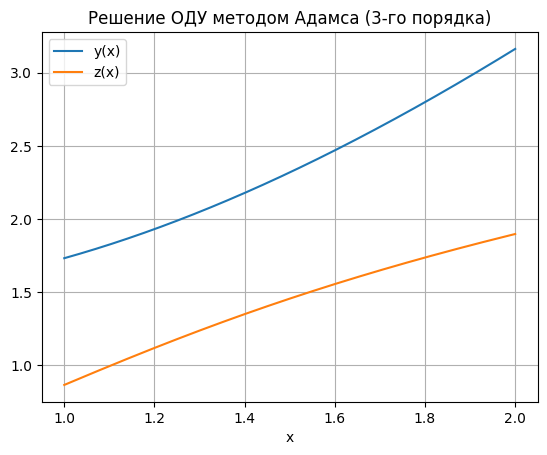

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.001  # шаг
N = int(1 / h)  # число шагов
x = np.linspace(1, 2, N+1)

# Начальные условия
y0 = np.sqrt(3)

def f_y(y, z, x):
    return z

def f_z(y, z, x):
    return -(z * z / y) + 2 * z / x;

# Рунге-Кутта 3-го порядка для первых двух шагов
def runge_kutta_step(y, z, x, h):
    k1y = h * f_y(y, z, x)
    k1z = h * f_z(y, z, x)
    
    k2y = h * f_y(y + 0.5 * k1y, z + 0.5 * k1z, x + 0.5 * h)
    k2z = h * f_z(y + 0.5 * k1y, z + 0.5 * k1z, x + 0.5 * h)
    
    k3y = h * f_y(y - k1y + 2 * k2y, z - k1z + 2 * k2z, x + h)
    k3z = h * f_z(y - k1y + 2 * k2y, z - k1z + 2 * k2z, x + h)

    y_next = y + (k1y + 4 * k2y + k3y) / 6
    z_next = z + (k1z + 4 * k2z + k3z) / 6

    return y_next, z_next

# Метод Адамса 3-го порядка
def adams_bashforth(y, z, x, h, f_y_vals, f_z_vals, i):
    y_next = y + h * ((5/12) * f_y_vals[i-2] - (4/3) * f_y_vals[i-1] + (23/12) * f_y_vals[i])
    z_next = z + h * ((5/12) * f_z_vals[i-2] - (4/3) * f_z_vals[i-1] + (23/12) * f_z_vals[i])
    return y_next, z_next

# Метод пристрелки
def shooting_method(z0_guess, target_z1):
    y = np.zeros(N+1)
    z = np.zeros(N+1)
    y[0] = y0
    z[0] = z0_guess

    # Первые два шага — Рунге-Кутта
    for i in range(2):
        y[i+1], z[i+1] = runge_kutta_step(y[i], z[i], x[i], h)

    f_y_vals = np.zeros(N+1)
    f_z_vals = np.zeros(N+1)

    # Вычисляем значения функций на первых трёх точках
    for i in range(3):
        f_y_vals[i] = f_y(y[i], z[i], x[i])
        f_z_vals[i] = f_z(y[i], z[i], x[i])

    # Метод Адамса
    for i in range(2, N):
        y[i+1], z[i+1] = adams_bashforth(y[i], z[i], x[i], h, f_y_vals, f_z_vals, i)
        f_y_vals[i+1] = f_y(y[i+1], z[i+1], x[i+1])
        f_z_vals[i+1] = f_z(y[i+1], z[i+1], x[i+1])

    return z[-1], y, z

# Целевое значение
target_z1 = 6 / np.sqrt(10)

max_iterations = 1000
tolerance = 1e-6
left = 0
right = 50

for iteration in range(max_iterations):
    z0_guess = (left + right) / 2
    z1, y_values, z_values = shooting_method(z0_guess, target_z1)

    if abs(z1 - target_z1) < tolerance:
        print(f"Решение найдено за {iteration+1} итераций: z0 = {z0_guess:.6f}")
        break
    
    if z1 < target_z1:
        left = z0_guess
    else:
        right = z0_guess
else:
    print("Решение не найдено за заданное число итераций")

# Визуализация решения
plt.plot(x, y_values, label='y(x)')
plt.plot(x, z_values, label='z(x)')
plt.xlabel('x')
plt.legend()
plt.title('Решение ОДУ методом Адамса (3-го порядка)')
plt.grid()
plt.show()
